# Homework: Roberto Valdivia García

### $ \cdot$ Find the cumulative distribution function for the Gaussian Distributin, and reproduce the plots. Choose a random number between 0 and 1, and use the CDF to assign the corresponding value of $H_{0}$. Generate as many as you want, and make the histogram of $H_{0}$ to verify you did right. Use a $\mu=70$ and $\sigma=2$.

#### -En la primera parte pesento cómo generar una distruibución aleatoria de número, la cual siga una distribución Normal, y la comparo con su función teorica.

In [1]:
import numpy as np

In [2]:
mu, sigma = 70, 2 
s = np.random.normal(mu, sigma, 1000)

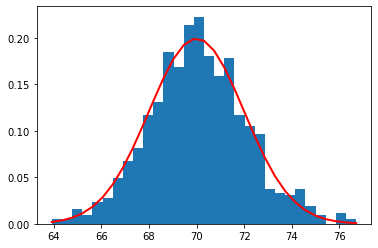

In [3]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.show()

#### -En esta segunda parte realizo la función de distribución acumulada(CDF), tanto la toórica como la experimenta, basada en la distribución anterior. De manera resumida la información que nos da la CDF es la probabilidad de que al seleccionar cierto número de la distribución, éste se encuentre entre un valor $\leq x$

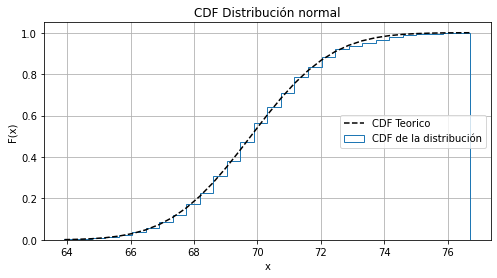

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(s, bins, density=True, histtype='step',cumulative=True, label='CDF de la distribución')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='CDF Teorico')

ax.grid(True)
ax.legend(loc='right')
ax.set_title('CDF Distribución normal')
ax.set_xlabel('x')
ax.set_ylabel('F(x)')

plt.show()

### Para la parte sobre H0:

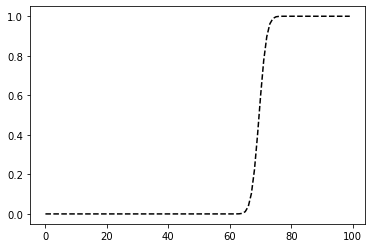

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
mu=70
sigma=2
bins=40
H0=np.zeros(100, dtype=float)
x = np.arange(0, 100)
#definimos la CDF
y = ((1 / (np.sqrt(2 * np.pi) * sigma))*np.exp(-0.5 * (1 / sigma * (x - mu))**2))
y=y.cumsum()
y /= y[-1]
plt.plot(x, y, 'k--', linewidth=1.5, label='CDF Teorico')
plt.show()
    

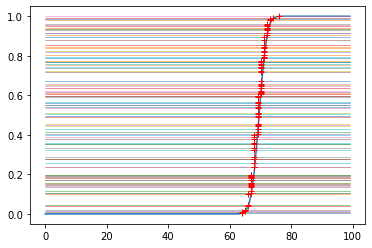

In [6]:
plt.plot(x, y, '-')
for j in range(len(H0)):
    #encontramos un número aleatorio
    r=random.uniform(0, 1)
    f = np.array([r for i in range(len(x))])   
    plt.plot(x, f, '-',linewidth=0.5)
    #encontramos el valor de H0 donde cruza el número aleatorio
    idx = np.argwhere(np.diff(np.sign(f - y))).flatten()
    plt.plot(x[idx], f[idx], 'r+',linewidth=0.5)
    H0[j]=idx[0]
    
plt.show()

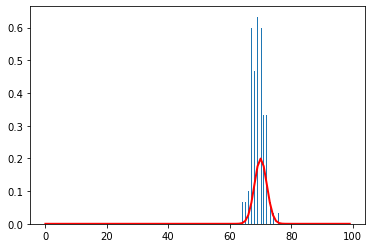

In [7]:
plt.hist(H0, bins=40, density=True)
plt.plot(x, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.show()

### -For the Poisson and Binomial, etc... distribution mentioned, find the CDF mean and standard deviation. Plot both the PDF and CDF, for some different values of mean and sigma.

### -Investigate about other useful distribution functions.

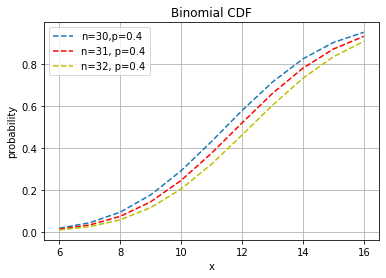

In [8]:
from scipy.stats import binom
N, p = 30, 0.4 
N2, p2 = 31, 0.4
N3, p3 = 32, 0.4
mu = N*p
sigma = np.sqrt(N*p*(1-p))

binomial = binom(N, p) 
binomial2 = binom(N2,p2)
binomial3 = binom(N3, p3)
x = np.arange(6,17,1)
CDF = binomial.cdf(x) 
CDF2 = binomial2.cdf(x)
CDF3 = binomial3.cdf(x)
plt.plot(x, CDF, '--', label='n=30,p=0.4')
plt.plot(x,CDF2, '--', color='r', label='n=31, p=0.4')
plt.plot(x,CDF3, '--', color='y', label='n=32, p=0.4')
plt.legend()
plt.title('Binomial CDF')
plt.ylabel('probability')
plt.grid()
plt.xlabel('x')
plt.show()

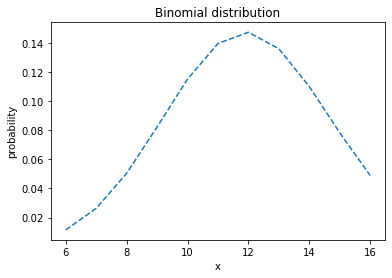

In [9]:
fmp = binomial.pmf(x)
plt.plot(x, fmp, '--')
plt.title('Binomial distribution')
plt.ylabel('probability')
plt.xlabel('x')
plt.show()

Otras funciones de distribución relevantes, son la binomial, de Poisson, distribución uniforme, distribución exponencial.

### -If $y=\phi (x) = exp(x)$ and p(x)=1 for $0\leq x \leq 1$(a uniform distribution). What is the resultant distribution for y.

Partiendo de la PDF tenemos:

### $p(y)=p_{x}\left[\Phi^{-1}(y)\right]\left|\frac{d \Phi^{-1}(y)}{d y}\right|$

si consideramos que $p(x)=1$ para $0\leq x \leq 1$ y $y=\phi(x)= e^{x}$, podemos escribir entonces su inversa como $\phi ^{-1}(y)=lny$ tal que

### $p(y)=\frac{d(\ln y)}{d y}=\frac{1}{y}$

de donde hicimos que $p_{x}(\phi ^{-1}(y))=1$.

### -Show explicitly that the linear least square method is derived from the minimization of the chi-square when the model is a straight line.

Tenemos Xi-Square:

### $  \chi^2=\frac{\sum\left(y_{i}-y(x_{i},\theta)\right)^{2}}{\sigma^2}$

y para encontrar los los punto singulares tenemos

### $    \frac{\partial \chi^2}{\partial\theta}=0$

La ecuación de la recta es

### $ y=ax+b$

donde los parámetro libres $\theta$ son a y b. Entonces tenemos las derivadas

### $\frac{\partial \chi^2}{\partial a}=\frac{2\sum\left(y_{i}-y(x_{i},\theta)x_{i}\right)}{\sigma^2}=0$

y

### $ \frac{\partial \chi^2}{\partial b}=\frac{2\sum\left(y_{i}-y(x_{i},\theta)\right)}{\sigma^2}=0$

O bien, el sistema siguiente de ecuaciones

### $\sum\left(y_{i}-ax_{i}-b\right)x_{i}=0$

### $  \sum\left(y_{i}-ax_{i}-b\right)=0$

despejando b de la segunda ecuación tenemos

### $b=\frac{1}{n}\left(\sum y_{i}-a\sum x_{i}\right)
$

y de la otra ecuación tenemos

### $\sum y_{i}x_{i}-a\sum x_{i}^{2}-b\sum x_{i}=0$

sustituyendo el valor de b en la ecuación anteior

### $\sum y_{i}x_{i}-a\sum x_{i}^{2}-\frac{1}{n}\left(\sum y_{i}-a\sum x_{i}\right)\sum x_{i}=0$

### $n\sum y_{i}x_{i}-an\sum x_{i}^{2}-\sum y_{i}\sum x_{i}+a\sum x_{i}\sum x_{i}=0$

y despejando a:

### $ a=\frac{n\sum y_{i}x_{i}-\sum y_{i}\sum x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$

ahora esto en la expresión de b

### $b=\frac{1}{n}\left(\sum y_{i}-\left[\frac{n\sum y_{i}x_{i}-\sum y_{i}\sum x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}\right]\sum x_{i}\right)$

podemos reducir b como:

### $  b=\frac{\sum y_{i}\sum x_{i}^{2}-\frac{1}{n}\sum y_{i}\left(\sum x_{i}\right)^2-\sum y_{i}x_{i}\sum x_{i}+\frac{1}{n}\sum y_{i}\left(\sum x_{i}\right)^2}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$

### $b=\frac{\sum y_{i}\sum x_{i}^{2}-\sum y_{i}x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$

por lo que finalmente obtenemos:

### $    a=\frac{n\sum y_{i}x_{i}-\sum y_{i}\sum x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$

### $b=\frac{\sum y_{i}\sum x_{i}^{2}-\sum y_{i}x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$